In [16]:
using Revise
using HierarchicalDA
using LinearAlgebra
using KernelFunctions
using AbstractGPs
using FastGaussQuadrature

In [2]:
using CairoMakie
using LaTeXStrings

[ Info: Precompiling CairoMakie [13f3f980-e62b-5c42-98c6-ff1f3baf88f0]
[ Info: Precompiling DomainSetsMakieExt [da481366-01c8-5b4d-b359-47a10c8532e7]
[ Info: Precompiling TrixiMakieExt [585a13d5-dd36-5759-a896-4d6603caa5ba]


In [67]:
x = gausslegendre(100)[1]#rand(10)

# Define GP prior with Matern-3/2 kernel
# f = GP(RationalKernel())
f = GP(PeriodicKernel(; r = [100.0]))

# Finite projection of `f` at inputs `x`.
# Added Gaussian noise with variance 0.001.
fx = f(x, 0.01)

AbstractGPs.FiniteGP{GP{ZeroMean{Float64}, PeriodicKernel{Float64}}, Vector{Float64}, Diagonal{Float64, FillArrays.Fill{Float64, 1, Tuple{Base.OneTo{Int64}}}}}(
f: GP{ZeroMean{Float64}, PeriodicKernel{Float64}}(ZeroMean{Float64}(), Periodic Kernel, length(r) = 1)
x: [-0.9997137267734413, -0.9984919506395958, -0.9962951347331251, -0.9931249370374434, -0.9889843952429918, -0.983877540706057, -0.9778093584869183, -0.9707857757637063, -0.9628136542558156, -0.9539007829254917  …  0.9539007829254917, 0.9628136542558156, 0.9707857757637063, 0.9778093584869183, 0.983877540706057, 0.9889843952429918, 0.9931249370374434, 0.9962951347331251, 0.9984919506395958, 0.9997137267734413]
Σy: [0.01 0.0 … 0.0 0.0; 0.0 0.01 … 0.0 0.0; … ; 0.0 0.0 … 0.01 0.0; 0.0 0.0 … 0.0 0.01]
)


In [68]:
rand(fx)

100-element Vector{Float64}:
 0.4039686118050121
 0.5299189640076774
 0.48805670716337984
 0.5464445154199105
 0.575552913247036
 0.32607289902451014
 0.490848930126245
 0.4554612074570035
 0.6029948958765783
 0.641076430426821
 0.5895941097096487
 0.2850601019667469
 0.4298484928521959
 ⋮
 0.4966188649664993
 0.5026643182886994
 0.4930802288392437
 0.41347481223128785
 0.5077097208057072
 0.5746386251278318
 0.47832809615033656
 0.4826045795155036
 0.563563065456343
 0.5368313783880253
 0.5299894242821428
 0.5487437684263334

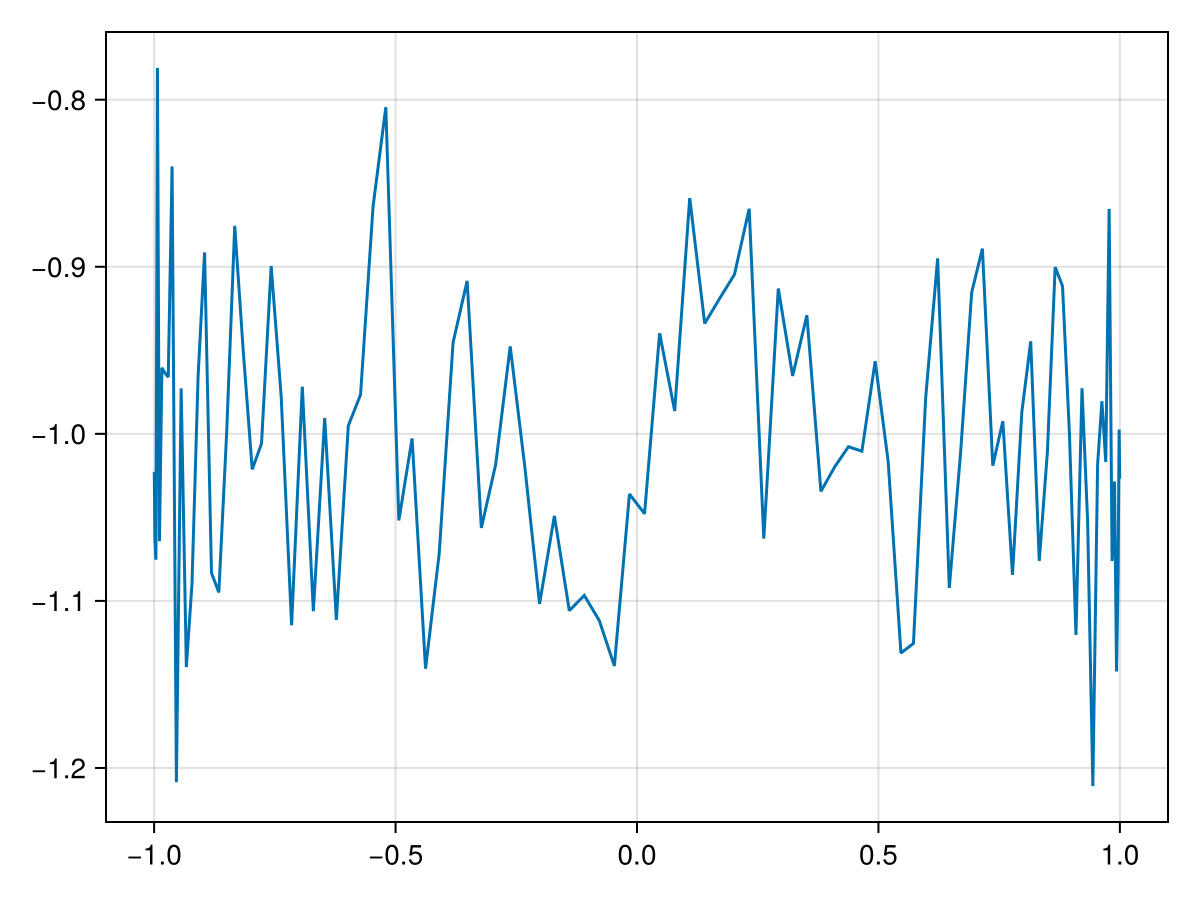

In [69]:
lines(x, rand(fx))

In [11]:
x = sample(n_samples, lower_bound, upper_bound, SobolSample())
y = f.(x)

LoadError: UndefVarError: `n_samples` not defined

In [8]:
using Distributions
# using Plots

# Define the mean and covariance functions for the Gaussian process
mean_function(x) = 0
covariance_function(x, y) = exp(-(x - y)^2)

# Define the grid of x values
x_grid = range(-5, stop=5, length=100)

# Construct the covariance matrix
cov_matrix = [covariance_function(x, y) for x in x_grid, y in x_grid]

# Draw a sample from the Gaussian process
gp_sample = rand(MvNormal(mean_function.(x_grid), Symmetric(cov_matrix + 0.1*I)))

# Plot the sampled function
# plot(x_grid, gp_sample, label="Sampled Function", xlabel="x", ylabel="f(x)", legend=:topleft)


100-element Vector{Float64}:
  1.0854282673986646
  1.2241828322643622
  1.8245324479788718
  1.9647203770669581
  1.771477961995794
  1.4457914842992179
  1.7783230548971856
  0.722068734789836
  0.6693294624474104
 -0.19032866152733952
  0.17975078097134248
  0.5614910256725308
 -0.31195584554316047
  ⋮
  0.2188229414389543
  0.2699655945795709
  0.1864934815282905
  0.25642163292537334
  0.6004601576095151
 -0.1323317219478442
 -0.7974197090990967
 -0.43989351694743223
 -1.5057355071012957
 -0.7639734459160645
 -0.7608615001151204
 -1.4599787024878208

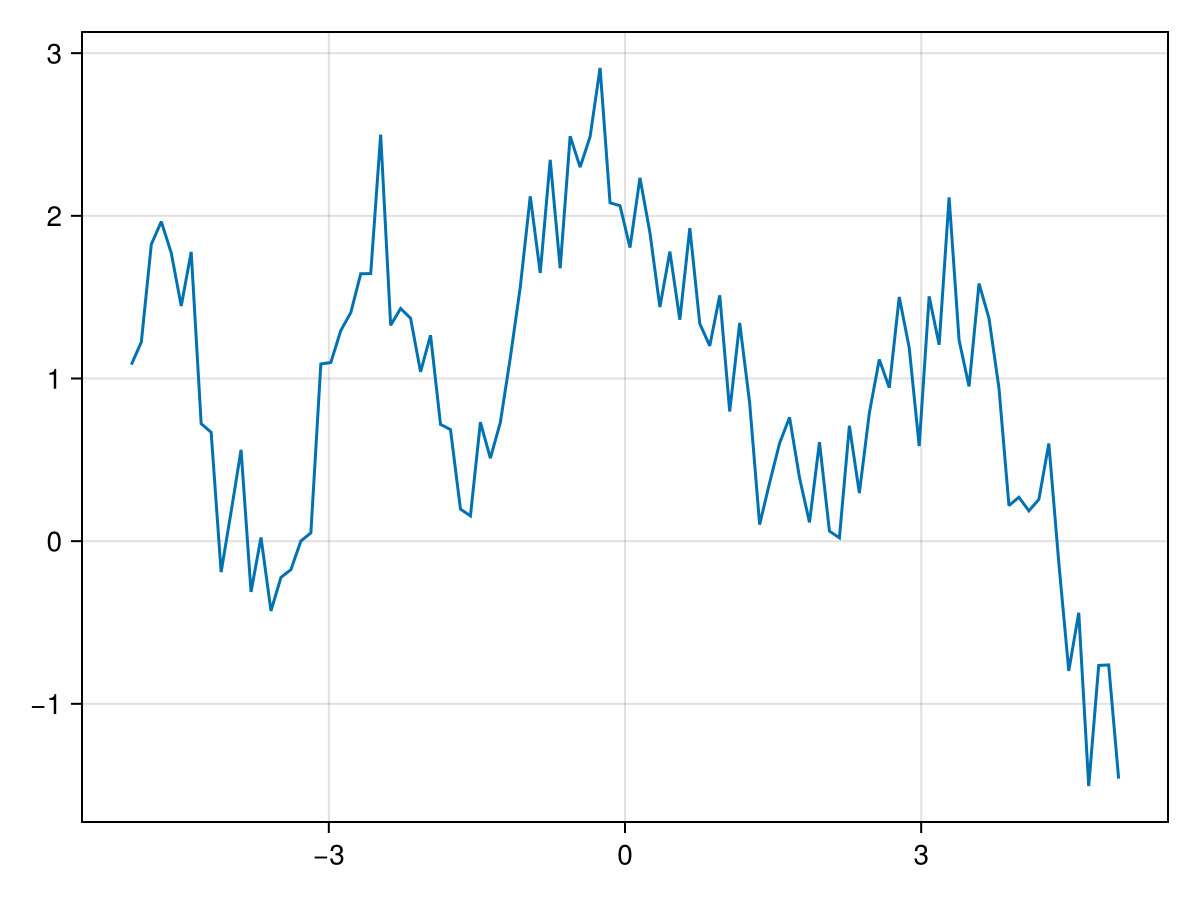

In [9]:
lines(x_grid, gp_sample)